### Building a Recommender system with Surprise

This try-it focuses on exploring additional algorithms with the `Suprise` library to generate recommendations.  Your goal is to identify the optimal algorithm by minimizing the mean squared error using cross validation. You are also going to select a dataset to use from [grouplens](https://grouplens.org/datasets/movielens/) example datasets.  

To begin, head over to grouplens and examine the different datasets available.  Choose one so that it is easy to create the data as expected in `Surprise` with user, item, and rating information.  Then, compare the performance of at least the `KNNBasic`, `SVD`, `NMF`, `SlopeOne`, and `CoClustering` algorithms to build your recommendations.  For more information on the algorithms see the documentation for the algorithm package [here](https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html).

Share the results of your investigation and include the results of your cross validation and a basic description of your dataset with your peers.



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#Surprise tools
from surprise import Reader
from surprise import Dataset
from surprise import SVD,SVDpp,KNNBasic,NMF,SlopeOne,CoClustering
from surprise.model_selection import cross_validate
from sklearn.manifold import TSNE

In [11]:
ratings_df = pd.read_csv('/Users/jayakanthjayaram/Downloads/ml-latest-small/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
movie_df=pd.read_csv('/Users/jayakanthjayaram/Downloads/ml-latest-small/movies.csv')
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
df = pd.merge(movie_df,ratings_df,on='movieId',how='inner')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [15]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [16]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [17]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Data frame visualize

In [18]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [19]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [20]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [22]:
ratings['No.of.ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,No.Of.ratings,No.of.ratings
title,,,
'71 (2014),4.0,1,1
'Hellboy': The Seeds of Creation (2004),4.0,1,1
'Round Midnight (1986),3.5,2,2
'Salem's Lot (2004),5.0,1,1
'Til There Was You (1997),4.0,2,2


<AxesSubplot:>

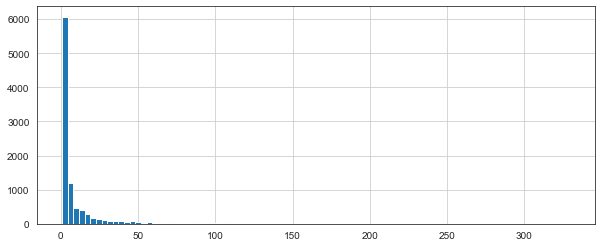

In [25]:
#Plot the histogram
plt.figure(figsize=(10,4))
ratings['No.of.ratings'].hist(bins=90)

<AxesSubplot:>

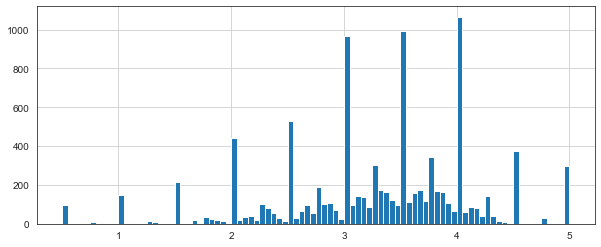

In [26]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=90)

Text(0.5, 6.799999999999994, 'Average ratings')

<Figure size 720x288 with 0 Axes>

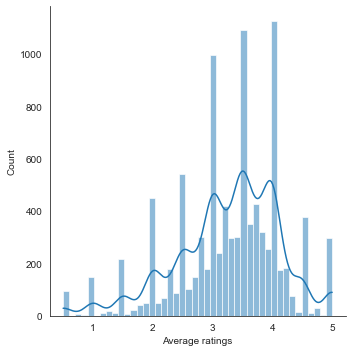

In [27]:
#Seaborn histogram
plt.figure(figsize=(10,4))
sns.displot(data=ratings,x='rating', kind='hist',kde=True)
plt.xlabel('Average ratings')

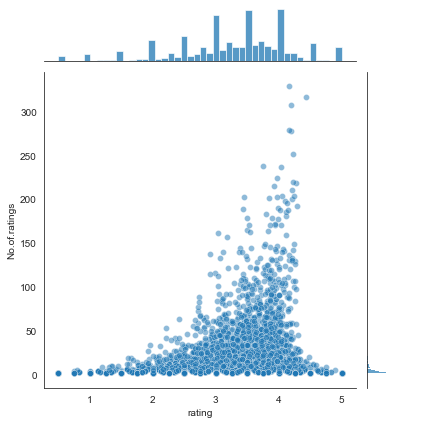

In [28]:
sns.jointplot(x='rating',y='No.of.ratings',data=ratings,alpha=0.5)

In [30]:
#Creating dataset for Suprise
reader=Reader(rating_scale=(1,5))
data=Dataset.load_from_df(ratings_df[['userId','movieId','rating']],reader)

In [31]:
#Model instantiation
fsvd=SVD(n_factors=5,
       n_epochs=1000,
       verbose=False,
         random_state=42)

svdpp=SVDpp(n_factors=2,
           n_epochs=1000,
           random_state=42)

knnbasic=KNNBasic(k=100)

nmf=NMF(n_factors=2,
       n_epochs=1000,
       random_state=42)

slopeone=SlopeOne()

cocluster=CoClustering(n_cltr_u=5,
                      n_cltr_i=5,
                      n_epochs=1000,
                      random_state=42)

In [32]:
#SVD Model
ssvdcv=cross_validate(algo=fsvd,
               data=data, 
               measures=['rmse'],
               cv=3,
              verbose=False)

In [33]:
fsvdcv_df=pd.DataFrame({'test_rmse':[0.97007522, 0.96939875, 0.96918698],
                       'fit_time':[10.002729177474976, 10.782934188842773, 10.498990535736084],
                       'test_time':[0.12656760215759277, 0.35283327102661133, 0.12451171875]})
fsvdcv_df

,test_rmse,fit_time,test_time
0,0.970075,10.002729,0.126568
1,0.969399,10.782934,0.352833
2,0.969187,10.498991,0.124512


In [34]:
fsvdcv_df.mean()

test_rmse     0.969554
fit_time     10.428218
test_time     0.201304
dtype: float64

In [35]:
#Generating rating prediction
fsvd.predict(uid=10, iid=100)

Prediction(uid=10, iid=100, r_ui=None, est=1.7769044963818208, details={'was_impossible': False})

In [36]:
#Visualize similiarities between books using TSNE
tsne = TSNE(n_components=2, n_iter=500, verbose=3, random_state=1)
movies_projected = tsne.fit_transform(fsvd.qi)
projection = pd.DataFrame(columns=['x', 'y'], data=movies_projected)
projection['title'] = movie_df['title']

/Users/jayakanthjayaram/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jayakanthjayaram/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8446 samples in 0.005s...
[t-SNE] Computed neighbors for 8446 samples in 0.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8446
[t-SNE] Computed conditional probabilities for sample 2000 / 8446
[t-SNE] Computed conditional probabilities for sample 3000 / 8446
[t-SNE] Computed conditional probabilities for sample 4000 / 8446
[t-SNE] Computed conditional probabilities for sample 5000 / 8446
[t-SNE] Computed conditional probabilities for sample 6000 / 8446
[t-SNE] Computed conditional probabilities for sample 7000 / 8446
[t-SNE] Computed conditional probabilities for sample 8000 / 8446
[t-SNE] Computed conditional probabilities for sample 8446 / 8446
[t-SNE] Mean sigma: 0.110837
[t-SNE] Computed conditional probabilities in 0.196s
[t-SNE] Iteration 50: error = 95.4059830, gradient norm = 0.0000564 (50 iterations in 1.037s)
[t-SNE] Iteration 100: error = 91.3360062, gradient norm = 0.0015219 (50 iterations in 1.

In [37]:
projection

,x,y,title
0,-26.605011,5.915750,Toy Story (1995)
1,13.537940,17.325325,Jumanji (1995)
2,-5.220554,35.983791,Grumpier Old Men (1995)
3,8.655357,22.032286,Waiting to Exhale (1995)
4,3.109819,30.811777,Father of the Bride Part II (1995)
...,...,...,...
8441,22.189383,29.596693,Million Dollar Arm (2014)
8442,-29.032969,16.101982,G.B.F. (2013)
8443,-1.012064,-38.595886,Jimi: All Is by My Side (2013)
8444,-36.197079,-6.584860,Bad Asses (Bad Ass 2) (2014)


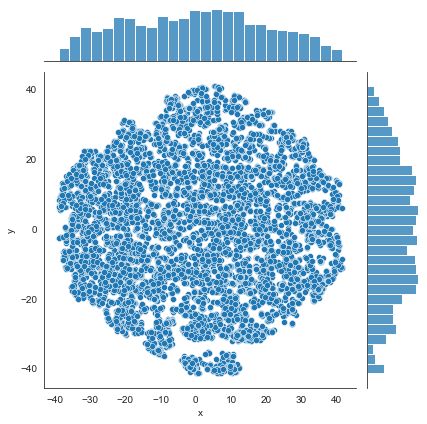

In [38]:
sns.jointplot(data=projection,x='x',y='y', kind='scatter',color=None, palette='coolwarm')
plt.show()

In [39]:
#KNN Basic model
knnbasiccv=cross_validate(algo=knnbasic,
               data=data, 
               measures=['rmse'],
               cv=3,
              verbose=False)
knnbasiccv
knncv_df=pd.DataFrame({'test_rmse':[0.96248186, 0.96756082, 0.95885983],
                       'fit_time':[0.06330227851867676, 0.08484292030334473, 0.07769942283630371],
                       'test_time':[1.2942686080932617, 1.634314775466919, 1.1661553382873535]})
knncv_df

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
0,0.962482,0.063302,1.294269
1,0.967561,0.084843,1.634315
2,0.958860,0.077699,1.166155


In [40]:
knncv_df.mean()

test_rmse    0.962968
fit_time     0.075282
test_time    1.364913
dtype: float64

In [41]:
#No negative matrix factorization
knmfcv=cross_validate(algo=nmf,
               data=data, 
               measures=['rmse'],
               cv=3,
              verbose=False)
knmfcv

{'test_rmse': array([0.89804607, 0.90483022, 0.89988114]),
 'fit_time': (21.51614499092102, 20.572078227996826, 20.278913021087646),
 'test_time': (0.34912586212158203, 0.22587990760803223, 0.1784651279449463)}

In [42]:
nmfcv_df=pd.DataFrame({'test_rmse':[0.90348684, 0.89902357, 0.89968167],
                       'fit_time':[15.058017253875732, 13.01422643661499, 13.348524808883667],
                       'test_time':[0.11276960372924805, 0.2527287006378174, 0.16670465469360352]})
nmfcv_df

,test_rmse,fit_time,test_time
0,0.903487,15.058017,0.112770
1,0.899024,13.014226,0.252729
2,0.899682,13.348525,0.166705


In [43]:
nmfcv_df.mean()

test_rmse     0.900731
fit_time     13.806923
test_time     0.177401
dtype: float64

In [44]:
#Slope One Model
#Cross validate the model using the data objects
slopeonecv=cross_validate(algo=slopeone,
               data=data, 
               measures=['rmse'],
               cv=3,
              verbose=False)
slopeonecv
slopeonecv_df=pd.DataFrame({'test_rmse':[0.9104934 , 0.90473779, 0.91557536],
                       'fit_time':[1.6712992191314697, 1.3257255554199219, 1.3497865200042725],
                       'test_time':[4.782657146453857, 4.907818555831909, 4.5770299434661865]})
slopeonecv_df

,test_rmse,fit_time,test_time
0,0.910493,1.671299,4.782657
1,0.904738,1.325726,4.907819
2,0.915575,1.349787,4.577030


In [45]:
slopeonecv_df.mean()

test_rmse    0.910269
fit_time     1.448937
test_time    4.755835
dtype: float64

In [51]:
#CoClusturing model
coclustercv=cross_validate(algo=cocluster,
               data=data, 
               measures=['rmse'],
               cv=3,
              verbose=False)
coclustercv

{'test_rmse': array([0.9646756 , 0.95310223, 0.96014752]),
 'fit_time': (105.50736260414124, 90.91758704185486, 92.23092699050903),
 'test_time': (0.11695098876953125, 0.12884998321533203, 0.12938594818115234)}

In [52]:
coclustercv_df=pd.DataFrame({'test_rmse':[0.96137917, 0.95997287, 0.95943802],
                       'fit_time':[89.8466944694519, 85.96856760978699, 80.37910008430481],
                       'test_time':[0.10594511032104492, 0.10052347183227539, 0.07810258865356445]})
coclustercv_df

,test_rmse,fit_time,test_time
0,0.961379,89.846694,0.105945
1,0.959973,85.968568,0.100523
2,0.959438,80.379100,0.078103


In [53]:
coclustercv_df.mean()

test_rmse     0.960263
fit_time     85.398121
test_time     0.094857
dtype: float64

In [55]:
result_df=pd.DataFrame({'Models':['KNNBasic','NMF','SVD','SlopeOne','CoClustering'],
               'test_rmse':[0.962968,0.900731,0.969554,0.910269, 0.960263],
               'fit_time':[0.075282,13.806923,10.428218,1.448937, 85.398121],
               'test_time':[1.364913, 0.177401,0.201304,4.755835, 0.094857]}).set_index('Models')
result_df

,test_rmse,fit_time,test_time
Models,,,
KNNBasic,0.962968,0.075282,1.364913
NMF,0.900731,13.806923,0.177401
SVD,0.969554,10.428218,0.201304
SlopeOne,0.910269,1.448937,4.755835
CoClustering,0.960263,85.398121,0.094857
